Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model # for linear regression

In [ ]:
# In case of using colab
'''
from google.colab import drive
drive.mount('/content/drive')
'''

In [ ]:
# Read csv data file
#ds = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset.csv', engine="python", header=0)
ds = pd.read_csv('./Dataset.csv', engine="python", header=0)

In [ ]:
# Fill loss data
ds.fillna(0)

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,THC,W/F,D/FEE,SUM
0,2014-01-01,NYK PHOENIX 50E52,KRPUS,DNA,ESDNA,1,3260.0,1071.3,"3,492,438","115,000","4,350","30,000","3,641,788"
1,2014-01-01,HANJIN LOS ANGELES 0120E,KRPUS,NYC,USNYC,1,3980.0,1071.7,"4,252,232","115,000","4,350","30,000","4,401,582"
2,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,2720.0,1065.6,"2,917,472","116,000","4,350","30,000","3,067,822"
3,2014-01-02,VIENNA EXPRESS 25E52,KRPUS,CHI,USCHI,1,2780.0,1072.3,"2,980,994","115,000","4,350","30,000","3,130,344"
4,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,3100.0,1065.6,"3,303,360","232,000","4,350","30,000","3,569,710"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15509,2020-09-30,MOL TRADITION 012W,KRPUS,HEL,SEHEL,1,1150.0,1180.9,"1,358,035","130,000","4,420","50,000","1,542,455"
15510,2020-09-30,SONGYUNHE 2038W,KRPUS,TEM,GHTEM,1,1369.0,1175.8,"1,609,670","130,000","4,420","40,000","1,784,090"
15511,2020-09-30,MALIAKOS 2007E,KRPUS,VAN,CAVAN,1,3112.0,1181.7,"3,677,450","135,000","4,420","40,000","3,856,870"
15512,2020-09-30,NORTHERN JAMBOREE 038N,KRPUS,CHI,USCHI,1,3200.0,1171.3,"3,748,160","140,000",0,"45,000","3,933,160"


In [ ]:
# Make set of "DESTINATION" category
destinations = sorted(set(ds["DESTINATION"])) # set

In [ ]:
sum = [] # save total sum of "SUM" at each "DESTINATION"
for key in destinations:
  temp = ds[ds["DESTINATION"] == key]
  tmp = 0
  for num in temp["SUM"]:
    tmp += int(num.replace(",",""))
  sum.append(tmp)

In [ ]:
# Make ("DESTINATION" , total sum of "SUM") pair dictionary
sum_set = {name:value for name,value in zip(destinations,sum) }
# Sort dictionary with total sum of "SUM"
sorted_dictionary = sorted(sum_set.items(), reverse=True, key=lambda item:item[1])

In [ ]:
print(sum[0])
print(destinations[0])
print(sum_set['AEAJM'])
print(sorted_dictionary[0][1])

11802048
AEAJM
11802048
3066275375


In [ ]:
name = []
total = []

In [ ]:
# Pick Upper 10 "DESTINATIONS"
for key, value in sorted_dictionary:
  if(len(name) >= 10):
    break
  name.append(key)
  total.append(value)

In [ ]:
print(name)
print(total)

['USLGB', 'USNYC', 'USLAX', 'USDET', 'USHOU', 'USCHI', 'UYSTY', 'USOAK', 'USSAV', 'CATOR']
[3066275375, 2996944908, 2447180307, 2270220033, 2160248305, 2106181232, 874453526, 725223370, 680821697, 593331148]


In [ ]:
import copy

In [ ]:
# list[each "DESTINATION"][each "MONTH"]
overall = [] # save total sum of "SUM" at each month for each "DESTINATION"
overall_number = [] # save frequency at each month for each "DESTINATION"

lst = []
for i in range(81):
  lst.append(0)
for i in range(10):
  overall.append(copy.deepcopy(lst))
  overall_number.append(copy.deepcopy(lst))
print(lst)
# 2014-01 ~ 2020-09 ==> 12 + 12 + 12 + 12 + 12 + 12 + 9
# 2014-01 --> 0
# 2020-09 --> 80
# index = (year-2014) * 12 + month - 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Extract "SUM" data and Save frequency
counter = 0 # index for 10 "DESTINATION"
for key in name:
  temp = ds[ds["DESTINATION"] == key]

  for column, row in temp.iterrows():
    position = (int(row["ONBOARD"][:4])-2014) * 12 + int(row["ONBOARD"][5:7]) - 1
    overall[counter][position] += int(row["SUM"].replace(",",""))
    overall_number[counter][position] += 1
  counter += 1

print(overall[0])
print(overall[1])
print(overall_number[0])
print(overall_number[1])

[37465191, 22195209, 27929297, 34501971, 24259657, 50425802, 55880491, 73165155, 81509694, 62315463, 62695288, 51535747, 24132793, 33367235, 65491470, 38354009, 40490964, 28624104, 38177391, 42522656, 43141615, 64461305, 58085981, 31548432, 46161768, 40631573, 27251148, 28005575, 49835617, 25913207, 31508923, 17815118, 13261588, 21087188, 1903693, 14244243, 14380817, 12682304, 7257370, 8348304, 20852413, 24269031, 6801586, 12735740, 21093964, 25191139, 38253721, 39146280, 30890654, 21369786, 34241881, 31978456, 26554845, 25166029, 29791987, 28710201, 41768535, 43913212, 62550634, 10051072, 46617141, 18923860, 29793502, 21514645, 23470462, 23059495, 25137253, 36388343, 36428098, 38183399, 36874093, 59170778, 18251422, 108239289, 60358017, 92379276, 35433065, 119304372, 113239966, 26980546, 68631831]
[17381094, 9053139, 25314986, 22428996, 26359423, 25528234, 21961234, 25116003, 16431476, 18934730, 19529770, 15681326, 20563532, 8817110, 17864408, 22892525, 23975840, 21078752, 14260532, 3

Start of Drawing Graph <br>
Use it with changing variable "index_number"<br>
It changes index of overall, overall_number, name

In [ ]:
index_number = 9

In [ ]:
# Make (x,y) pair for drawing graph
xi = []
for i in range(81):
  xi.append(i+1)
yi = overall[index_number]

# Make label for x-axis
label=[]
for j in range(7):
  for i in range(12):
    label.append(str(i+1))
    if(j == 6 and i==9):
      break

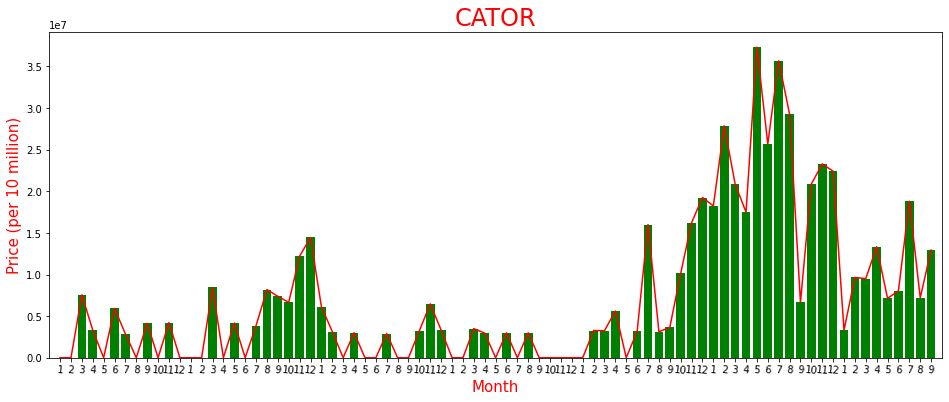

In [ ]:
'''
# In case of using Linear Regression
reg = linear_model.LinearRegression()
reg.fit(np.array(xi).reshape((-1, 1)), yi)
y_pred = reg.predict(np.array(xi).reshape((-1, 1)))
plt.plot(xi, y_pred, color='red')
'''
# Draw Graph
#plt.scatter(xi, yi)
plt.figure(figsize=(16,6))
plt.xticks(xi, labels=label, rotation=-5)
plt.xlim(0,82)
plt.plot(xi, yi, color ='red')
plt.bar(xi, yi, color='green')

plt.title(name[index_number], fontdict={'size':24, 'color':'red'})
plt.xlabel('Month', fontdict={'size':15, 'color':'red'})
plt.ylabel('Price (per 10 million)', fontdict={'size':15, 'color':'red'})
plt.show()

In [ ]:
# Make (x,y) pair for drawing graph
new_xi = []
new_yi = []
for i in range(81):
  new_xi.append(i+1)
for i in range(len(yi)):
  if overall_number[index_number][i] == 0:
    new_yi.append(0)
    continue
  new_yi.append(overall[index_number][i] / overall_number[index_number][i])

print(new_yi)

[0, 0, 3783075.0, 3308450.0, 0, 2963446.0, 2861752.0, 0, 4138130.0, 0, 4224175.0, 0, 0, 0, 4223860.0, 0, 4168230.0, 0, 3864460.0, 4091990.0, 3688125.0, 3324752.5, 3051851.25, 2889784.0, 3071380.0, 3131285.0, 0, 3011862.0, 0, 0, 2907460.0, 0, 0, 3246240.0, 3235492.5, 3308560.0, 0, 0, 3492510.0, 2959525.0, 0, 2985005.0, 0, 2991466.0, 0, 0, 0, 0, 0, 3271706.0, 3246116.0, 2804769.0, 0, 3163830.0, 3200450.6, 3126980.0, 3638533.0, 3381411.6666666665, 3244523.0, 3209094.5, 3040414.0, 3096467.111111111, 2980431.5714285714, 2916721.0, 3110838.0833333335, 3210832.125, 3243793.3636363638, 3254012.222222222, 3330890.0, 2981795.0, 3326971.5714285714, 3201716.4285714286, 3321801.0, 3214896.6666666665, 3169937.3333333335, 3333855.5, 3565831.0, 4021120.5, 3761874.2, 3603480.0, 4311797.333333333]


In [ ]:
'''
# In case of using Linear Regression
reg = linear_model.LinearRegression()
reg.fit(np.array(new_xi).reshape((-1, 1)), new_yi)
#new_y_pred = reg.predict(np.array(new_xi).reshape((-1, 1)))
#plt.plot(new_xi, new_y_pred, color='red')
'''
# Draw AVG Graph
#plt.scatter(new_xi, new_yi)
plt.figure(figsize=(16,6))
plt.xticks(xi, labels=label, rotation=-5)
plt.xlim(0,82)
plt.plot(new_xi, new_yi, color ='red')
plt.bar(new_xi, new_yi, color='green')

plt.title(name[index_number], fontdict={'size':24, 'color':'red'})
plt.xlabel('Month', fontdict={'size':15, 'color':'red'})
plt.ylabel('Average Price (per million)', fontdict={'size':15, 'color':'red'})
plt.show()

Codes for make output

In [ ]:
# Make list for saving AVG Price at each month for each "DESTINATION"
temp_index_number = 0
save_file = [] # Save AVG Price
while temp_index_number != 10:
  new_xi = []
  new_yi = []
  for i in range(81):
    new_xi.append(i+1)
  for i in range(len(yi)):
    if overall_number[temp_index_number][i] == 0:
      new_yi.append(0)
      continue
    new_yi.append(overall[temp_index_number][i] / overall_number[temp_index_number][i])
  save_file.append(new_yi)
  temp_index_number += 1

In [ ]:
# Make output csv file
o1 = np.array(overall)
o2 = np.array(overall_number)
out = np.array(save_file)
print(out)
for i in range(10):
  n0_out = pd.DataFrame(out[i], columns = ["AVGPRICE"])
  n1_out = pd.DataFrame(o1[i], columns = ["TotalPrice"])
  n2_out = pd.DataFrame(o2[i], columns = ["Number"])
  n_out = pd.concat([n0_out, n1_out, n2_out], axis=1)
  n_out["Month"] = (n_out.index + 1)
  n_out = n_out[["Month","TotalPrice","Number","AVGPRICE"]]
  n_out.to_csv("AVG"+str(i+1)+".csv", index = False)
print(n_out)